<h2 align="right">Case Study 5</h2> 
<h1 align="center">Case Study on ANOVA</h1><br/>
<h2>Objectives :</h2><br>
XYZ Company has offices in four different zones. The company wishes to
investigate the following : (dataset: Sales_data_zone_wise.csv). 

<ul>
<li>The mean sales generated by each zone.
</li>
<li>Total sales generated by all the zones for each month.
</li>
<li>Check whether all the zones generate the same amount of sales.
</li>
</ul>
Help the company to carry out their study with the help of data provided.
<br/>
<br/>

In [65]:
import pandas as pd
# load data file
df = pd.read_csv("Sales_data_zone_wise.csv")
df.head()

,Month,Zone - A,Zone - B,Zone - C,Zone - D
0,Month - 1,1483525,1748451,1523308,2267260
1,Month - 2,1238428,1707421,2212113,1994341
2,Month - 3,1860771,2091194,1282374,1241600
3,Month - 4,1871571,1759617,2290580,2252681
4,Month - 5,1244922,1606010,1818334,1326062


In [73]:
df.describe()

,Zone - A,Zone - B,Zone - C,Zone - D
count,2.900000e+01,2.900000e+01,2.900000e+01,2.900000e+01
mean,1.540493e+06,1.755560e+06,1.772871e+06,1.842927e+06
std,2.619401e+05,1.683899e+05,3.331937e+05,3.750165e+05
min,1.128185e+06,1.527574e+06,1.237722e+06,1.234311e+06
25%,1.305972e+06,1.606010e+06,1.523308e+06,1.520406e+06
50%,1.534390e+06,1.740365e+06,1.767047e+06,1.854412e+06
75%,1.820196e+06,1.875658e+06,2.098463e+06,2.180416e+06
max,2.004480e+06,2.091194e+06,2.290580e+06,2.364132e+06


# The mean sales generated by each zone.

In [66]:
df1=df[['Zone - A','Zone - B','Zone - C','Zone - D']]

In [67]:
a=df1['Zone - A']
b=df1['Zone - B']
c=df1['Zone - C']
d=df1['Zone - D']
import numpy as np
m1=np.mean(a)
m2=np.mean(b)
m3=np.mean(c)
m4=np.mean(d)

print('Mean sales for Zone A: {}'.format(m1))
print('Mean sales for Zone  B: {}'.format(m2))
print('Mean sales for Zone  C: {}'.format(m3))
print('Mean sales for Zone  D: {}'.format(m4))

Mean sales for Zone A: 1540493.1379310344
Mean sales for Zone  B: 1755559.5862068965
Mean sales for Zone  C: 1772871.0344827587
Mean sales for Zone  D: 1842926.7586206896



<ul>
<li>Mean sales for Zone A: 1540493.1379310344</li>
<li>Mean sales for Zone  B: 1755559.5862068965</li>
<li>Mean sales for Zone  C: 1772871.0344827587</li>
<li>Mean sales for Zone  D: 1842926.7586206896</li>
</ul>

<br/>

# Total sales generated by all the zones for each month.

In [68]:
df2=df.drop(['Zone - A','Zone - B','Zone - C','Zone - D'],axis=1)
df2['Total Sales']=df.sum(axis=1)
df2

,Month,Total Sales
0,Month - 1,7022544
1,Month - 2,7152303
2,Month - 3,6475939
3,Month - 4,8174449
4,Month - 5,5995328
5,Month - 6,7151387
6,Month - 7,7287108
7,Month - 8,7816299
8,Month - 9,6703395
9,Month - 10,7128210


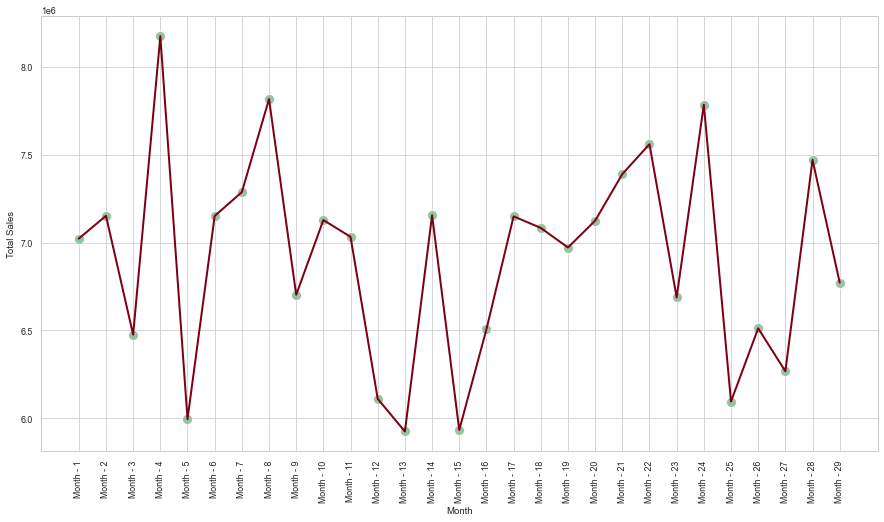

In [69]:
fig, ax = plt.subplots(figsize=(15, 8))
sns.set(style="whitegrid")                                                 
paper_rc = {'lines.linewidth': 2, 'lines.markersize': 10}                  
sns.set_context("paper", rc = paper_rc)  
ax = sns.lineplot(x='Month', y='Total Sales', data=df2, color='#7d0013')
ax = sns.scatterplot(x = 'Month', y = 'Total Sales',data = df2, color='#99c2a2')
plt.xticks(rotation=90)
plt.show()

# Check whether all the zones generate the same amount of sales.

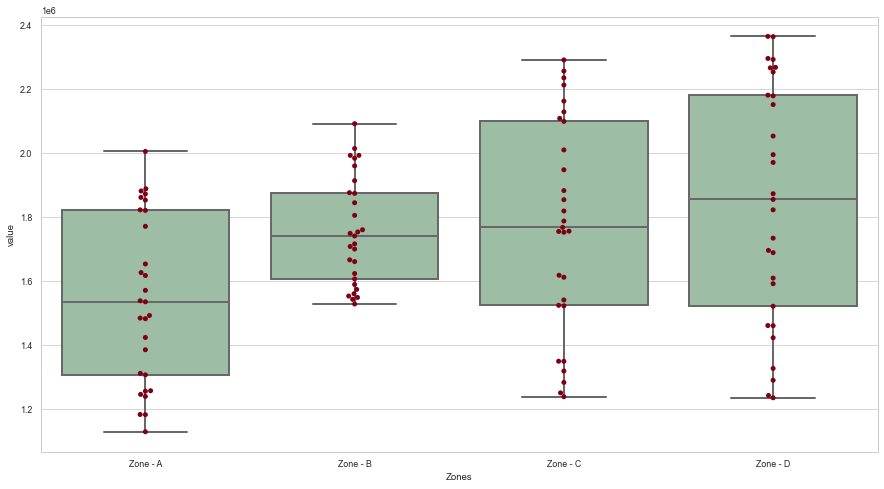

In [70]:
df1_melt = pd.melt(df1.reset_index(), id_vars=['index'], value_vars=['Zone - A', 'Zone - B', 'Zone - C', 'Zone - D'])
# replace column names
df1_melt.columns = ['index', 'Zones', 'value']

# generate a boxplot to see the data distribution by zones. Using boxplot, we can 
# easily detect the differences between different zones
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(figsize=(15, 8))
ax = sns.boxplot(x='Zones', y='value', data=df1_melt, color='#99c2a2')
ax = sns.swarmplot(x="Zones", y="value", data=df1_melt, color='#7d0013')
plt.show()

In [71]:
import scipy.stats as stats
# stats f_oneway functions takes the groups as input and returns ANOVA F and p value
fvalue, pvalue = stats.f_oneway(df1['Zone - A'], df1['Zone - B'], df1['Zone - C'], df1['Zone - D'])
print('F Value: ',fvalue, '\nP Value :',pvalue)

# get ANOVA table as R like output
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Ordinary Least Squares (OLS) model
model = ols('value ~ C(Zones)', data=df1_melt).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

F Value:  5.672056106843581 
P Value : 0.0011827601694503335


,sum_sq,df,F,PR(>F)
C(Zones),1.483058e+12,3.0,5.672056,0.001183
Residual,9.761449e+12,112.0,NaN,NaN


In [72]:
# ANOVA table using bioinfokit v1.0.3 or later (it uses wrapper script for anova_lm)
from bioinfokit.analys import stat
res = stat()
res.anova_stat(df=df1_melt, res_var='value', anova_model='value ~ C(Zones)')
res.anova_summary

# note: if the data is balanced (equal sample size for each group), Type 1, 2, and 3 sums of squares
# (typ parameter) will produce similar results.

,df,sum_sq,mean_sq,F,PR(>F)
C(Zones),3.0,1.483058e+12,4.943525e+11,5.672056,0.001183
Residual,112.0,9.761449e+12,8.715579e+10,NaN,NaN


A one-way ANOVA uses the following null and alternative hypotheses:
<li> H0 (null hypothesis): μ1 = μ2 = μ3 = … = μk (all the population means are equal).</li><br/>
<li> H1 (null hypothesis): at least one population mean is different from the rest.</li>

#### INTERPRETATION<br/>
<li>The p value obtained from ANOVA analysis is significant (p < 0.05), and therefore, we reject H0. so we can conclude that <b>there are significant differences among mean sales generated by each Zones.</b></li>
<li>F value is inversely related to p value and higher F value (greater than F critical value) indicates a significant p value.
</li>

